# Distribuciones de Probabilidad

In [72]:
import pandas as pd
import numpy as np
import math
import scipy
import matplotlib.pyplot as plt
%matplotlib inline

## Distribuciones de Probabilidad Continua

Las distribuciones continuas son en las que la variable puede tomar cualquier valor dentro de un intervalo específico.

### Distribución Normal

La distribución normal es una distribución de probabilidad continua muy útil que nos ayuda a describir o aproximar muchos fenómenos naturales. En el corazón de esta distribución está la idea de que los resultados son más probables cuanto más cercanos están a la media. Su función de distribución de probabilidad es:

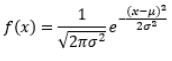

1. Ejemplo cáculo cdf.

Varios test de inteligencia dieron una puntuación que sigue una ley normal con media 100 y desviación típica 15

- Determinar el porcentaje de población que obtendría un coeficiente entre 95 y 110 


In [145]:
prob = norm.cdf(110, 100, 15) - norm.cdf(95, 100, 15)
print ('La probabilidad de que un valor de nuestra distribución sea mayor que 95 y menor que 110 es de %.4f por ciento' % (prob * 100))

La probabilidad de que un valor de nuestra distribución sea mayor que 95 y menor que 110 es de 37.8066 por ciento


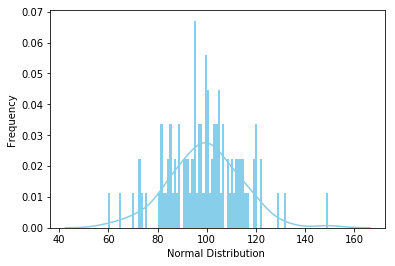

In [149]:
import seaborn as sns

n = 100
mean= 100
std = 15
data_norm = norm.rvs(size = n, loc = mean, scale = std)
ax = sns.distplot(data_norm,
                  bins=100,
                  kde=True,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Normal Distribution ', ylabel='Frequency');

2. Ejemplo cálculo cdf.

Un estudio ha mostrado que, en un cierto barrio, el 60% de los hogares tienen al menos dos televisores. Se elige al azar una muestra de 50 hogares en el citado barrio. Se pide:

- ¿Cuál es la probabilidad de que al menos 20 de los citados hogares tengan, cuanto menos, dos televisores? 
- ¿Cuál es la probabilidad de que entre 35 y 40 hogares tengan, cuanto menos, dos televisores?

In [73]:
#Ojo, me dan parámetros de una distribución binomial para el apartado 1. Expresados: B(50,0.6)
#Por lo que tengo que convertir la binomial a normal para ver la distribución acumulada de que x >= 20
p = 0.6
q = 0.4
n = 50
k = 20

Recordemos el teorema del límite central.

Para aplicar la transformación tiene que darse que:

        n * p ≥ 5 y n * q ≥ 5.

Así, la distribución binomial B(n, p) se puede aproximar mediante una distribución normal:
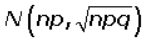


In [76]:
normal_mean = n * p
normal_std = np.sqrt(n*p*q)
normal_mean, normal_std

(30.0, 3.4641016151377544)

In [92]:
prob_1 = 1 - norm.cdf(20, 30.0, 3.4641016151377544)

print ('La probabilidad de que un valor de nuestra distribución sea mayor que 20 es de %.4f' % (prob_1))

La probabilidad de que un valor de nuestra distribución sea mayor que 20 es de 0.9981


In [93]:
#apartado 2
prob_2 = norm.cdf(40, 30.0, 3.4641016151377544) - norm.cdf(35, 30.0, 3.4641016151377544)
print ('La probabilidad de que un valor de nuestra distribución sea mayor que 35 y menor que 40 es de %.4f' % (prob_2))

La probabilidad de que un valor de nuestra distribución sea mayor que 35 y menor que 40 es de 0.0725


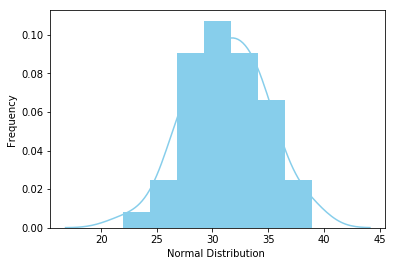

In [150]:
import seaborn as sns

n = 50
mean= 30
std = 3.4641016151377544
data_norm = norm.rvs(size=n, loc = mean, scale = std)
ax = sns.distplot(data_norm,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Normal Distribution ', ylabel='Frequency');

### Distribución Uniforme

En esta distribución, la probabilidad se distribuye uniformemente por todo el espacio muestral. En este caso, dos segmentos de igual tamaño en el espacio muestral continuo tendrán la misma probabilidad.

Típicamente, denotamos los límites del espacio muestral de a a b. La probabilidad de un segmento de c a d es:

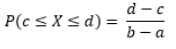

3. Ejemplo cálculo cdf en distribución uniforme.

En una cierta fábrica se fabrican cada día una media de 40 mil metros de cable. Unos días más, otros días menos. Aunque el mínimo seguro que siempre es 30 mil metros. La variable aleatoria que recoge el número de metros de cable fabricados en un día sigue una distribución uniforme continua.

- ¿Qué porcentaje de días se fabrican más de 34 mil metros de cable?

In [151]:
#primer parámetro, valor máximo de nuestro intervalo
#segundo parámetro, donde arranca nuestro intervalo
#tercer parámetro, longitud del intervalo de la distribución
#valor mínimo distribución = 30 mil
#media distribución = 40 mil
#valor máximo distribución = 50 mil
#valor arranque de nuestro intervalo = 34 mil
#longitud intervalo distribución = 20 mil

prob = uniform.cdf(50000, 34000, 20000)
print ('El %.2f por ciento de los días se fabrican más de 34 mil metros de cable' % (prob*100))

El 80.00 por ciento de los días se fabrican más de 34 mil metros de cable


[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Uniform Distribution ')]

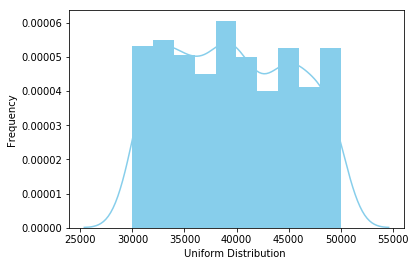

In [157]:
import seaborn as sns

n = 1000
start = 30000
width = 20000
data_uniform = uniform.rvs(size=n, loc = start, scale=width)
ax = sns.distplot(data_uniform,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Uniform Distribution ', ylabel='Frequency')

## Representaciones de las distribuciones de probabilidad

Si queremos representar u obtener un valor de probabilidad de una distribución continua, vamos a calcular la función de densidad de probabilidad (pdf).

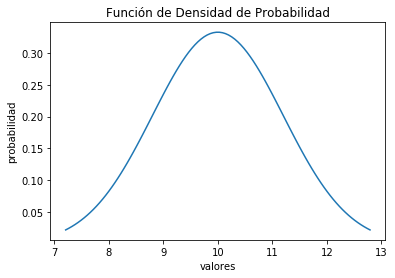

In [156]:
# Función de Densidad de Probibilidad con Python
# ppf es la función cuantil. Estima valores de una distribución dado un cuantil y unos parámetros de distribución
# en este caso le doy los parámetros y creo el objeto normal y estimo los valores desde el 
# cuantil 0.01 hasta el 0.99 (toda la distribución)
x_1 = np.linspace(stats.norm(10, 1.2).ppf(0.01),
                  stats.norm(10, 1.2).ppf(0.99), 100)
FDP_normal = stats.norm(10, 1.2).pdf(x_1) # FDP
plt.plot(x_1, FDP_normal, label='FDP nomal')
plt.title('Función de Densidad de Probabilidad')
plt.ylabel('probabilidad')
plt.xlabel('valores')
plt.show()

Si queremos representar u obtener un valor de probabilidad de una distribución discreta, vamos a calcular la función de masas de probabilidad (pmf).

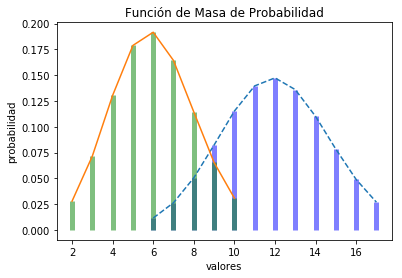

In [163]:
# FMP
n, p = 30, 0.4 # parámetros de forma de la distribución binomial
n_1, p_1 = 20, 0.3 # parámetros de forma de la distribución binomial
x = np.arange(stats.binom.ppf(0.01, n, p),
              stats.binom.ppf(0.99, n, p))
x_1 = np.arange(stats.binom.ppf(0.01, n_1, p_1),
              stats.binom.ppf(0.99, n_1, p_1))
fmp = stats.binom.pmf(x, n, p) # Función de Masa de Probabilidad
fmp_1 = stats.binom.pmf(x_1, n_1, p_1) # Función de Masa de Probabilidad
plt.plot(x, fmp, '--')
plt.plot(x_1, fmp_1)
plt.vlines(x, 0, fmp, colors='b', lw=5, alpha=0.5)
plt.vlines(x_1, 0, fmp_1, colors='g', lw=5, alpha=0.5)
plt.title('Función de Masa de Probabilidad')
plt.ylabel('probabilidad')
plt.xlabel('valores')
plt.show()

In [161]:
x

array([ 6.,  7.,  8.,  9., 10., 11., 12., 13., 14., 15., 16., 17.])

En el caso de que el número de valores sea muy grande o de que queramos calcular una probabilidad acumulada vamos a utilizar la función de distribución acumulada (cdf), tanto para continuas como para discretas.

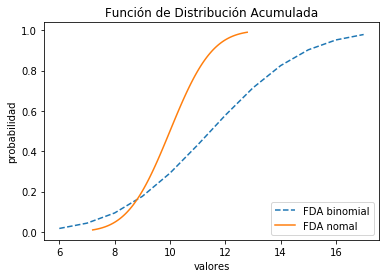

In [164]:
# Función de Distribución Acumulada con Python
x_1 = np.linspace(stats.norm(10, 1.2).ppf(0.01),
                  stats.norm(10, 1.2).ppf(0.99), 100)
fda_binom = stats.binom.cdf(x, n, p) # Función de Distribución Acumulada
fda_normal = stats.norm(10, 1.2).cdf(x_1) # Función de Distribución Acumulada
plt.plot(x, fda_binom, '--', label='FDA binomial')
plt.plot(x_1, fda_normal, label='FDA nomal')
plt.title('Función de Distribución Acumulada')
plt.ylabel('probabilidad')
plt.xlabel('valores')
plt.legend(loc=4)
plt.show()